In [11]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd
import copy

In [12]:
provinces= ['Ontario', 'Quebec','Manitoba','Wisconsin','Vermont','Nebraska','New York','Kansas','Illinois',
            'Delaware','Connecticut','Indiana','Missouri','Michigan','New Jersey','Kentucky','Minnesota',
            'Ohio','Iowa','Pennsylvania','Maryland','Virginia','West Virginia','North Dakota','South Dakota','Nunavut']
provinces1=['ON','QC','MB','WI','VT','NE','NY','KS','IL','DE','CT','IN','MO','MI','NJ','KY','MN','OH','IA','PA','MD','VA','WV','ND','SD','NU']
Latitudes= [50,53,56.4,44.5,44,41.5,43,38.5,40,39,41.6,40.3,38.6,44.2,39.8,37.8,46.4,
            40.4,42,41.2,39,38,39,47.7,44.5,62]
Longitudes=[-85,-76,-98.7,-89.5,-72,-100,-75,-98,-89,-73.5,-72.7,-86,-92.6,-84.5,-74.9,-84.3,-94.6,
            -83,-93.6,-77.2,-76.6,-78,-80.5,-99,-99,-98]

In [13]:
prod2000_60x60=np.load('prod2000_60x60.npy')
prod2005_60x60=np.load('prod2005_60x60.npy')
prod2010_60x60=np.load('prod2010_60x60.npy')
average=(prod2000_60x60+prod2005_60x60+prod2010_60x60)/3

In [14]:
fn1 = 'landuse-15crops_2015soc_annual_1850_2014.nc'
ds0=xr.open_dataset(fn1,decode_times=False)
ds0

<xarray.Dataset>
Dimensions:                        (time: 165, lon: 720, lat: 360)
Coordinates:
  * time                           (time) float64 189.0 190.0 ... 352.0 353.0
  * lon                            (lon) float64 -179.8 -179.2 ... 179.2 179.8
  * lat                            (lat) float64 89.75 89.25 ... -89.25 -89.75
Data variables: (12/31)
    c3per_irrigated                (time, lat, lon) float32 ...
    c3per_rainfed                  (time, lat, lon) float32 ...
    c4per_irrigated                (time, lat, lon) float32 ...
    c4per_rainfed                  (time, lat, lon) float32 ...
    maize_irrigated                (time, lat, lon) float32 ...
    maize_rainfed                  (time, lat, lon) float32 ...
    ...                             ...
    temperate_roots_irrigated      (time, lat, lon) float32 ...
    temperate_roots_rainfed        (time, lat, lon) float32 ...
    tropical_cereals_irrigated     (time, lat, lon) float32 ...
    tropical_cereals_rainfed       (time, lat, lon) float32 ...
    tropical_roots_irrigated       (time, lat, lon) float32 ...
    tropical_roots_rainfed         (time, lat, lon) float32 ...
Attributes:
    source:            Based on LUH2 v2h and Global Harvested Area for 175 crops
    institution:       Potsdam Institute for Climate Impact Research
    references:        Frieler et al., Geosci. Model Dev. Discuss., doi:10.51...
    comment:           LUH2 functional crop types disaggregated to 15 ISIMIP ...
    further_info_url:  http://www.isimip.org
    title:             ISIMIP2a ext historical land-use dataset
    contact:           info@isimip.org

In [15]:
#sub domain
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65 

ds = ds0.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

In [16]:
t1 = ds["maize_rainfed"][-10:]
t1m=t1.mean(dim='time')*100
t1m01=np.copy(t1m)
np.nanmax(t1m)

38.70056

In [17]:
maskt1m=np.array(t1m).flatten().copy()
maskt1m[maskt1m>0]=1
maskt1m[maskt1m<=0]=0
np.nansum(maskt1m)

1626.0

In [19]:
maskt1m01=np.array(t1m).flatten().copy()
maskt1m01[maskt1m01>=0.1]=1
maskt1m01[maskt1m01<0.1]=np.nan
mask20052014=np.reshape(maskt1m01,(60,60))
np.save('mask20052014.npy',mask20052014)
np.nansum(maskt1m01)

1232.0

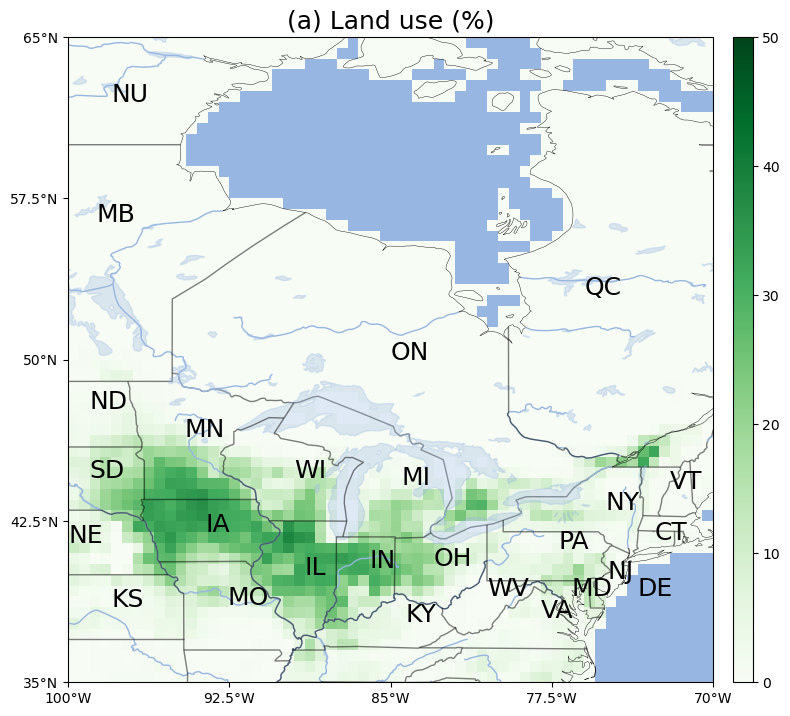

In [9]:
lats = t1.coords['lat'][:]
lons = t1.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(8,8))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

#for i, ax in enumerate(axgr):

ax=axgr[0]
#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.3)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
ax.set_title('(a) Land use (%)',fontsize=18)
ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
ax.set_xlim([-100,-70])
ax.set_ylim([35,65])
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
for iprov in range(26):
    ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)    
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
p = ax.pcolormesh(X, Y, t1m,
                  vmin=0.0,
                  vmax=50,
                  transform=projection,
                  cmap='Greens')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )

axgr.cbar_axes[0].colorbar(p,ax=ax)
plt.tight_layout()
plt.show()
fig.savefig('final_figures/figure1a_landuse_fraction.png',dpi=150)    

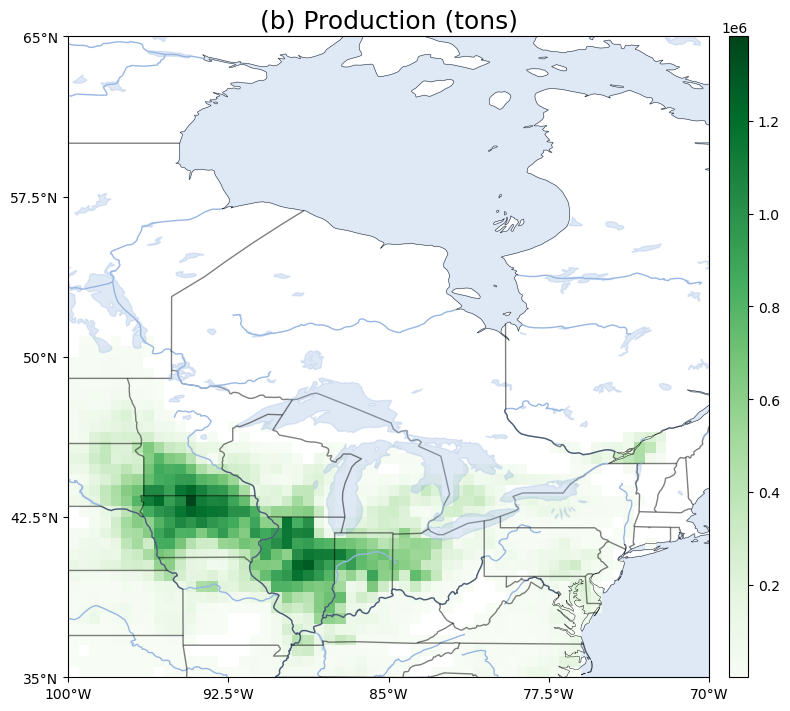

In [10]:
lats = t1.coords['lat'][:]
lons = t1.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(8,8))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

#for i, ax in enumerate(axgr):

ax=axgr[0]
#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
ax=axgr[0]
ax.add_feature(cfeature.OCEAN,alpha=0.3)
ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.3)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
ax.set_title('(b) Production (tons)',fontsize=18)
ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
ax.set_xlim([-100,-70])
ax.set_ylim([35,65])
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
p = ax.pcolormesh(X, Y, average,
#                        vmin=0,
#                        vmax=1500000,                      
                  transform=projection,
                  cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )

axgr.cbar_axes[0].colorbar(p,ax=ax)    
plt.tight_layout()    
plt.show()
fig.savefig('final_figures/figure1b_production.png',dpi=150)

In [95]:
np.save('Historical_maize_rainfed_10_1986_2005_landuse_fraction_new.npy',t1m)

In [96]:
t1m.shape

(60, 60)

In [97]:
t1 = ds["maize_irrigated"][-10:]
t1m=t1.mean(dim='time')*100
np.nanmax(t1m)

45.961124

In [98]:
maskt1m=np.array(t1m).flatten().copy()
maskt1m[maskt1m>0]=1
maskt1m[maskt1m<=0]=0
np.nansum(maskt1m)

87.0

In [99]:
maskt1m01=np.array(t1m).flatten().copy()
maskt1m01[maskt1m01>=0.1]=1
maskt1m01[maskt1m01<0.1]=np.nan
np.nansum(maskt1m01)

86.0

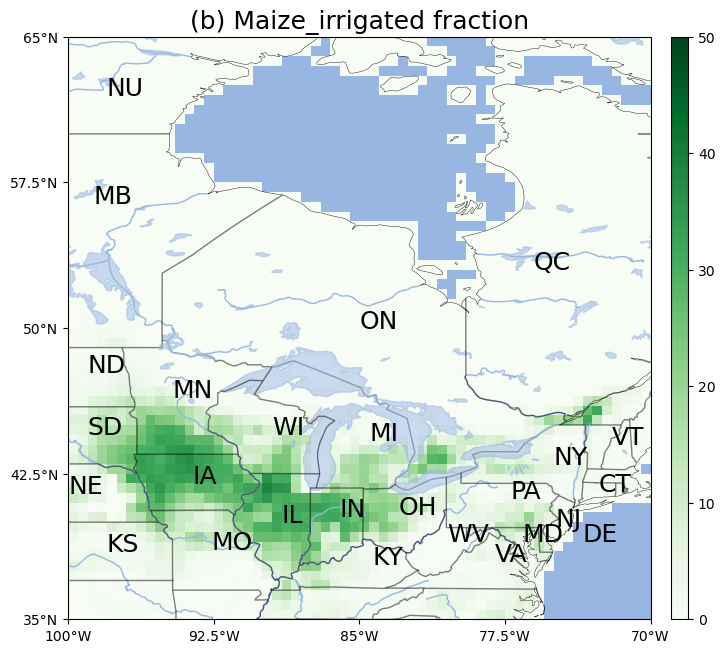

In [44]:
lats = t1.coords['lat'][:]
lons = t1.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(8,8))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('(b) Maize_irrigated fraction',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    for iprov in range(26):
        ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)     
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, t1m,
                      vmin=0.0,
                      vmax=50,
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('landuse_figures/Historical_maize_maize_rainfed_irrigated_10y_1986-2005_landuse_fraction_new.png',dpi=150)

In [101]:
np.save('Historical_maize_maize_rainfed_irrigated_10y_1986-2005_landuse_fraction_new.npy',t1m)

In [102]:
np.nanmax(t1m+t1m01)

46.409737

In [103]:
maskt1m=np.array(t1m+t1m01).flatten().copy()
maskt1m[maskt1m>0]=1
maskt1m[maskt1m<=0]=0
np.nansum(maskt1m)

1629.0

In [104]:
maskt1m01=np.array(t1m+t1m01).flatten().copy()
maskt1m01[maskt1m01>=0.1]=1
maskt1m01[maskt1m01<0.1]=np.nan
np.nansum(maskt1m01)

1244.0

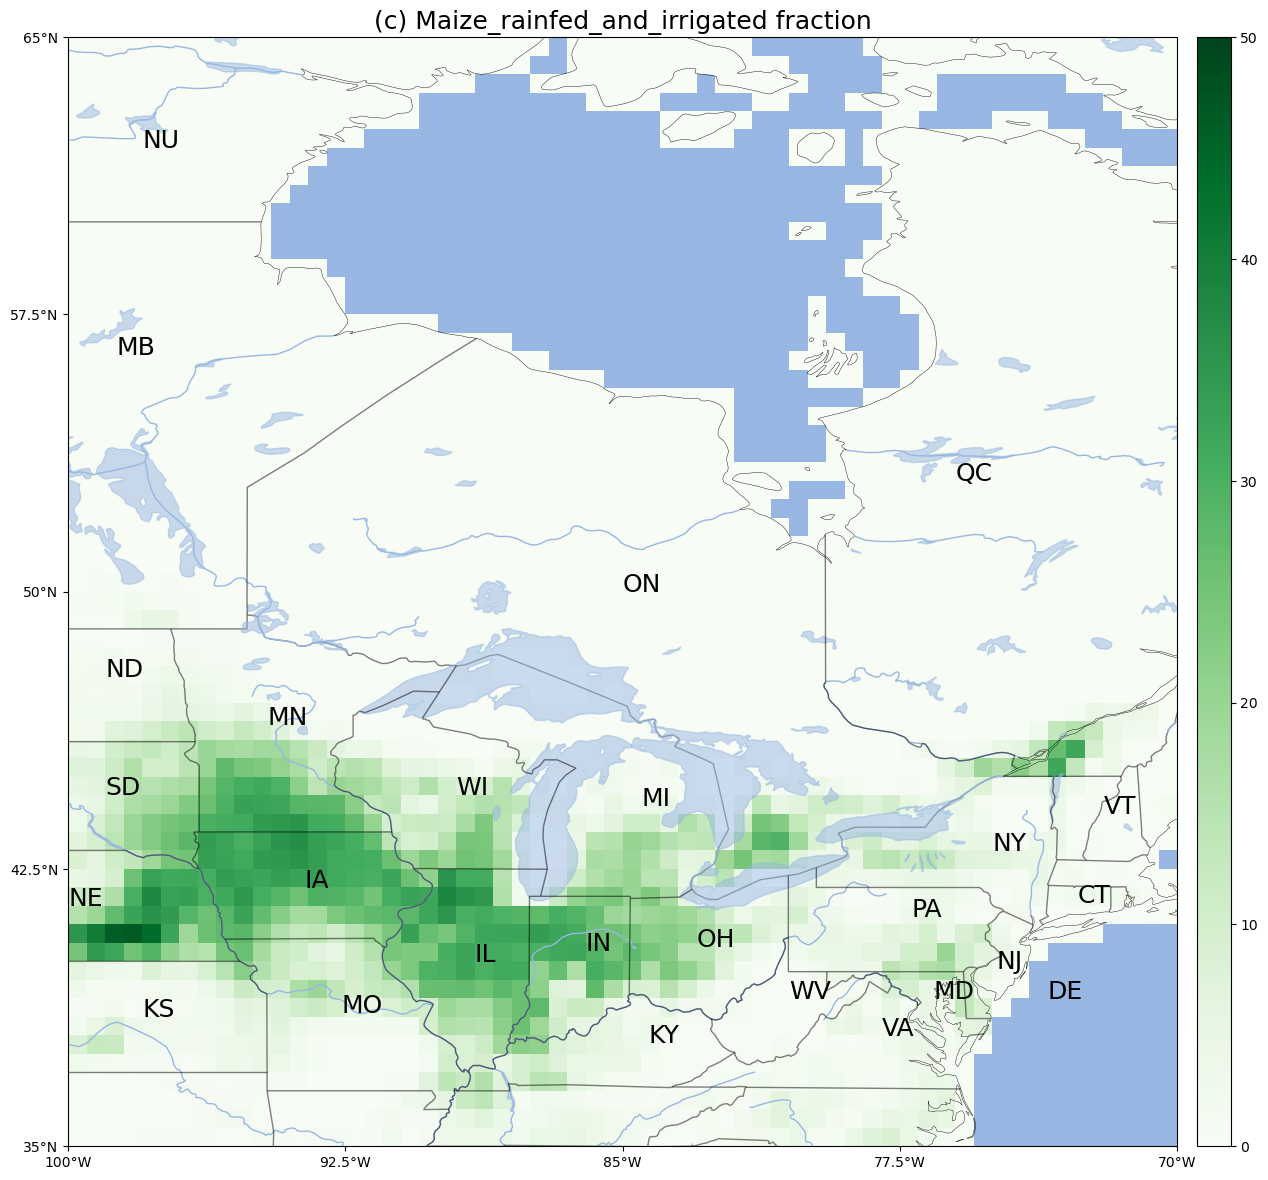

In [105]:
lats = t1.coords['lat'][:]
lons = t1.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('(c) Maize_rainfed_and_irrigated fraction',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    for iprov in range(26):
        ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)     
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, t1m+t1m01,
                      vmin=0.0,
                      vmax=50,
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('landuse_figures/Historical_maize_maize_rainfed_and_irrigated_10y_1986-2005_landuse_fraction_new.png',dpi=150)

In [106]:
landuse_total=t1m+t1m01
np.save('Historical_maize_maize_rainfed_and_irrigated_20y_1986-2005_landuse_fraction.npy',landuse_total)